<a href="https://colab.research.google.com/github/CharlyMech/IEDIB_CEIA_2024-25/blob/main/Modelos%20de%20Inteligencia%20Artificial/Bloque%207/Actividades/7.1/sectionB/modified_code/modified_random_walks_with_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To fully see the code and assets:

[Link to GutHub repo](https://github.com/CharlyMech/IEDIB_CEIA_2024-25/blob/main/Modelos%20de%20Inteligencia%20Artificial/Bloque%207/Actividades/7.1/sectionB/modified_code/modified_random_walks_with_stable_diffusion.ipynb)

# Modified code

In this notebook there are the following modifications as the statement of this task specifies:

- Modify the interpolation value between 2 prompts **(1)**

- Modify the interpolation value between 4 prompts **(2)**

- Path around a text prompt **(3)**

- Circular path **(4)**

The modifications will be labeled as follows: _#!(N)_

where N is the number specified above.

In [1]:
# !pip install keras-cv --upgrade --quiet
!pip install --upgrade pip
!pip install --upgrade tensorflow==2.18.0 keras keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 43.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0


In [2]:
import keras_cv
import keras
import matplotlib.pyplot as plt
from keras import ops
import numpy as np
import math
from PIL import Image

# Enable mixed precision
# (only do this if you have a recent NVIDIA GPU)
keras.mixed_precision.set_global_policy("mixed_float16")

# Instantiate the Stable Diffusion model
model = keras_cv.models.StableDiffusion(jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [3]:
# prompt_1 = "A watercolor painting of a Golden Retriever at the beach"
# prompt_2 = "A still life DSLR photo of a bowl of fruit"
prompt_1 = "A space ship from a star wars movie made with pixelart style"
prompt_2 = "A dramatic scene about a falling banana"
interpolation_steps = 8 #!(1) -> Interpolation steps from 5 to 8 (more accurate)

encoding_1 = ops.squeeze(model.encode_text(prompt_1))
encoding_2 = ops.squeeze(model.encode_text(prompt_2))

interpolated_encodings = ops.linspace(encoding_1, encoding_2, interpolation_steps)

# Show the size of the latent manifold
print(f"Encoding shape: {encoding_1.shape}")

1356917/1356917 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
492466864/492466864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Encoding shape: (77, 768)


In [4]:
seed = 12345
noise = keras.random.normal((512 // 8, 512 // 8, 4), seed=seed)

images = model.generate_image(
    interpolated_encodings,
    batch_size=interpolation_steps,
    diffusion_noise=noise,
)

3439090152/3439090152 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 112s 212ms/step
198180272/198180272 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:

def export_as_gif(filename, images, frames_per_second=10, rubber_band=False):
    if rubber_band:
        images += images[2:-1][::-1]
    images[0].save(
        filename,
        save_all=True,
        append_images=images[1:],
        duration=1000 // frames_per_second,
        loop=0,
    )

# "doggo-and-fruit-5.gif",
export_as_gif(
    "spaceship-and-falling_banana-5.gif",
    [Image.fromarray(img) for img in images],
    frames_per_second=2,
    rubber_band=True,
)

![Spaceship and falling banana](./spaceship-and-falling_banana-5.gif)

In [6]:
interpolation_steps = 150
batch_size = 3
batches = interpolation_steps // batch_size

interpolated_encodings = ops.linspace(encoding_1, encoding_2, interpolation_steps)
batched_encodings = ops.split(interpolated_encodings, batches)

images = []
for batch in range(batches):
    images += [
        Image.fromarray(img)
        for img in model.generate_image(
            batched_encodings[batch],
            batch_size=batch_size,
            num_steps=25,
            diffusion_noise=noise,
        )
    ]

# export_as_gif("doggo-and-fruit-150.gif", images, rubber_band=True)
export_as_gif("spaceship-and-falling_banana-150.gif", images, rubber_band=True)

25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 109ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━

![Spaceship and banana falling](./spaceship-and-falling_banana-150.gif)

<!-- ![Spaceship and banana falling](./spaceship-and-falling_banana-5.gif) -->

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step


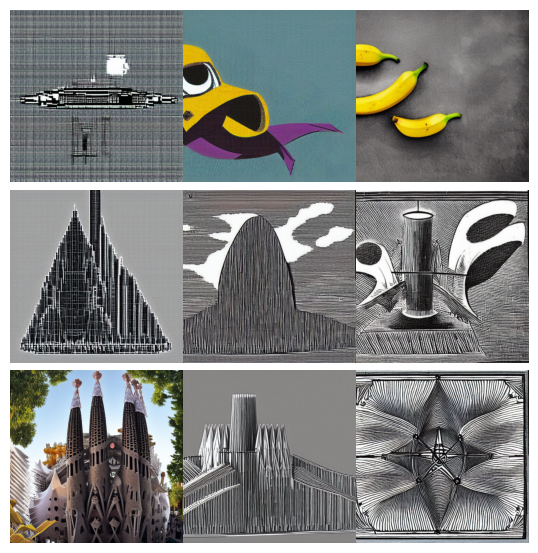

In [10]:
# prompt_1 = "A watercolor painting of a Golden Retriever at the beach"
# prompt_2 = "A still life DSLR photo of a bowl of fruit"
# prompt_3 = "The eiffel tower in the style of starry night"
# prompt_4 = "An architectural sketch of a skyscraper"
prompt_1 = "A space ship from a star wars movie made with pixelart style"
prompt_2 = "A dramatic scene about a falling banana"
prompt_3 = "The Sagrada Familia if it was designed and build by Frank Gehry"
prompt_4 = "An atom design made by the Egyptians"

interpolation_steps = 3 #!(2) -> Interpolation steps from 6 to 3 (less accurate)
batch_size = 3
batches = (interpolation_steps**2) // batch_size

encoding_1 = ops.squeeze(model.encode_text(prompt_1))
encoding_2 = ops.squeeze(model.encode_text(prompt_2))
encoding_3 = ops.squeeze(model.encode_text(prompt_3))
encoding_4 = ops.squeeze(model.encode_text(prompt_4))

interpolated_encodings = ops.linspace(
    ops.linspace(encoding_1, encoding_2, interpolation_steps),
    ops.linspace(encoding_3, encoding_4, interpolation_steps),
    interpolation_steps,
)
interpolated_encodings = ops.reshape(
    interpolated_encodings, (interpolation_steps**2, 77, 768)
)
batched_encodings = ops.split(interpolated_encodings, batches)

images = []
for batch in range(batches):
    images.append(
        model.generate_image(
            batched_encodings[batch],
            batch_size=batch_size,
            diffusion_noise=noise,
        )
    )


def plot_grid(
    images,
    path,
    grid_size,
    scale=2,
):
    fig, axs = plt.subplots(
    grid_size, grid_size, figsize=(grid_size * scale, grid_size * scale)
    )
    fig.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.margins(x=0, y=0)
    plt.axis("off")
    for ax in axs.flat:
        ax.axis("off")
    images = images.astype(int)
    for i in range(min(grid_size * grid_size, len(images))):
        ax = axs.flat[i]
        ax.imshow(images[i].astype("uint8"))
        ax.axis("off")
    for i in range(len(images), grid_size * grid_size):
        axs.flat[i].axis("off")
        axs.flat[i].remove()
    plt.savefig(
        fname=path,
        pad_inches=0,
        bbox_inches="tight",
        transparent=False,
        dpi=60,
    )


images = np.concatenate(images)
plot_grid(images, "4-way-interpolation.jpg", interpolation_steps)

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step


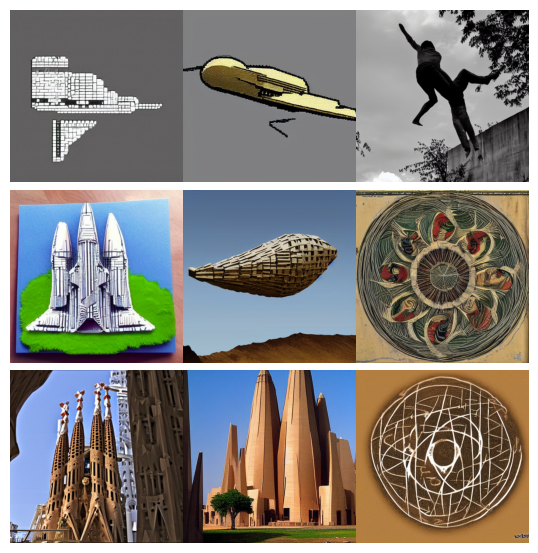

In [11]:
images = []
for batch in range(batches):
    images.append(model.generate_image(batched_encodings[batch], batch_size=batch_size))

images = np.concatenate(images)
plot_grid(images, "4-way-interpolation-varying-noise.jpg", interpolation_steps)

In [15]:
prompt = "A futuristic cityscape at night"
encoding = ops.squeeze(model.encode_text(prompt))
walk_steps = 150
batch_size = 3
batches = walk_steps // batch_size
radius = 0.1

angles = np.linspace(0, 2 * np.pi, walk_steps)
token_count, embedding_dim = encoding.shape
walked_encodings = []

for angle in angles:
    offset = radius * np.array([np.cos(angle), np.sin(angle)] + [0] * (embedding_dim - 2), dtype=np.float32)
    delta = ops.convert_to_tensor(np.tile(offset, (token_count, 1)), dtype=encoding.dtype)
    walked_encodings.append(encoding + delta)

walked_encodings = ops.stack(walked_encodings)
batched_encodings = ops.split(walked_encodings, batches)

images = []
for batch in range(batches):
    images += [
        Image.fromarray(img)
        for img in model.generate_image(
            batched_encodings[batch],
            batch_size=batch_size,
            num_steps=25,
            diffusion_noise=noise,
        )
    ]

export_as_gif("city-scape-at-night.gif", images, rubber_band=True)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━

![City scape at night](./city-scape-at-night.gif)

In [ ]:
prompt = "An oil paintings of cows in a field next to a windmill in Holland"
encoding = ops.squeeze(model.encode_text(prompt))
walk_steps = 150
batch_size = 3
batches = walk_steps // batch_size
radius = 0.15

angles = np.linspace(0, 2 * np.pi, walk_steps)
token_count, embedding_dim = encoding.shape
walked_encodings = []

for angle in angles:
    offset = radius * np.array([np.cos(angle), np.sin(angle)] + [0] * (embedding_dim - 2), dtype=np.float32)
    delta = ops.convert_to_tensor(np.tile(offset, (token_count, 1)), dtype=encoding.dtype)
    walked_encodings.append(encoding + delta)

walked_encodings = ops.stack(walked_encodings)
batched_encodings = ops.split(walked_encodings, batches)

images = []
for batch in range(batches):
    images += [
        Image.fromarray(img)
        for img in model.generate_image(
            batched_encodings[batch],
            batch_size=batch_size,
            num_steps=25,
            diffusion_noise=noise,
        )
    ]

export_as_gif("cows.gif", images)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
25/25 ━━━━━━━━━━

![Cows](./cows.gif)
